In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BernoulliNB
from sklearn import preprocessing

import category_encoders as ce

ImportError: cannot import name 'BernoulliNB' from 'sklearn.linear_model' (e:\Anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [2]:
df = pd.read_csv("D:/course@ovgu/job/munich_accidents.csv")

In [3]:
df.drop(['VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT'], inplace=True, axis=1)
#df = df.loc[df["MONAT" != 'Summe']

In [4]:
#print(df)

df = df.rename(columns={"MONATSZAHL": "Category", "AUSPRAEGUNG": "Type", "JAHR":"Year","MONAT":"Month", "WERT":"value"})
data = df[df['Year'] < 2021]
#print (df)
#print(data)

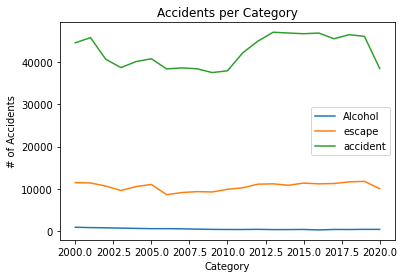

In [5]:
# plot line
Alcohol = data[(
    (data['Category'] == 'Alkoholunfälle') &
    (data['Month'] == 'Summe') &
    (data['Type'] == 'insgesamt')
    )]

escape = data[(
    (data['Category'] == 'Fluchtunfälle') &
    (data['Month'] == 'Summe') &
    (data['Type'] == 'insgesamt')
    )]

accident = data[(
    (data['Category'] == 'Verkehrsunfälle') &
    (data['Month'] == 'Summe') &
    (data['Type'] == 'insgesamt')
    )]
fig, ax = plt.subplots()

plt.plot(Alcohol ['Year'], Alcohol['value'].to_numpy(), label = "line1" )
plt.plot(escape ['Year'], escape['value'].to_numpy(), label  = "line2" )
plt.plot(accident ['Year'], accident['value'].to_numpy(), label = "line3")
plt.legend(['Alcohol','escape','accident'])
plt.title("Accidents by Year")

ax.set_title("Accidents per Category")
ax.set_ylabel ("# of Accidents")
ax.set_xlabel ("Category")

plt.show()

In [6]:

data2 = data[(data['Month'] != "Summe")]

ordinal_cols_mapping = [{
    "col": "Category",
    "mapping": {
        'Alkoholunfälle': 0,
        'Fluchtunfälle': 1,
        'Verkehrsunfälle': 2
    }}, {
    "col": "Type",
    "mapping": {
        'insgesamt': 0,
        'Verletzte und Getötete': 1,
        'mit Personenschäden': 2,
    }}
]

In [20]:
X = data2[['Category','Type', 'Year','Month']]
X['Month'] = X['Month'].str[-2:]
encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, return_df = True)
df_train = encoder.fit_transform(X)

#X = data3[['Category','Type','Month', 'Year']].values
X = X[['Category','Type','Month', 'Year']].values
Y = data2 ['value'].values

#print(X)
X_train, X_test, Y_train, Y_test = train_test_split(df_train, Y,test_size = 0.9,random_state= 42) 

reg= linear_Model = LinearRegression()

e:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
reg.fit(X_train,Y_train)

LinearRegression()

In [26]:
prediction = reg.predict([[0,0,2021,1]])
print(int(prediction))

444


e:\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [31]:
from sklearn.naive_bayes import GaussianNB
bnb = GaussianNB()
bnb.fit(X_train,Y_train)
my_prediction_bnb_df = bnb.predict([[0,0,2020,1]]) # Testing On The First Row -> Result Should be = 28 
print(int(my_prediction_bnb_df))

28


e:\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, Y_train)
predictions = knn.predict([[0,0,2021,1]])
print(int(predictions))

24


e:\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict([[0,0,2021,1]])
print(int(predictions))

28


e:\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
